#Aula

Na análise de dados, é importante descobrir como variáveis quantitativas se relacionam entre si, encontrando tendências e exceções, aumentando a compreensão dos dados. Essa tarefa é simplificada através de técnicas de visualização de dados.
Ao analisar uma variável quantitativa de um conjunto de dados, é útil conhecer a sua distribuição. Porém, muitos conjuntos de dados possuem mais de uma variável quantitativa. Nesses casos, muitas vezes será interessante descobrir se essas variáveis possuem alguma relação entre si. Por exemplo, em dados de altura e peso de pessoas, existe uma tendência estatística de que quanto maior a altura maior o peso de um indivíduo. Porém, isso não é uma regra, pois podem haver indivíduos altos e com baixo peso, e vice-versa. Portanto, chamamos isso de correlação. Nessa perspectiva, uma maneira bastante útil de descobrir se duas variáveis estão correlacionadas é através de gráficos de dispersão.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

#valor total da conta; o valor da gorjeta; o sexo do cliente, se ele é fumante ou não; o dia da semana 
#em que ocorreu; a refeição; e o número de pessoas na mesa.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


O gráfico de dispersão, em inglês, scatterplot, representa os dados como pontos em um plano cartesiano. O valor de uma variável é mapeado na posição do eixo horizontal, enquanto outra variável é mapeada na posição vertical. É um tipo de gráfico bastante utilizado pela sua simplicidade de compreensão e por tornar evidente padrões presentes nos dados. Dessa forma, criar gráficos de dispersão, utilizando seaborn é muito simples, principalmente, através da função scatterplot(). Então, os parâmetros básicos da função são iguais aos de outras funções do seaborn, que você já deve ter utilizado, sendo necessário passar a coluna que será mapeada no eixo x, a que será mapeada no eixo y, além do conjunto de dados. 

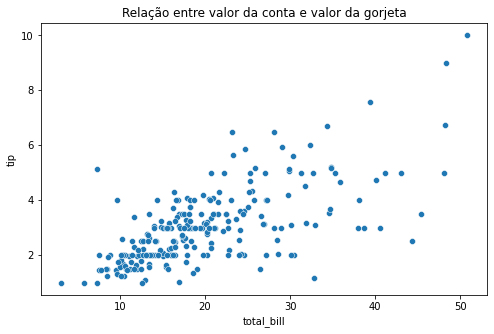

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Relação entre valor da conta e valor da gorjeta')
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()

A correlação pode ser positiva ou negativa. No exemplo anterior, a correlação entre a conta e a gorjeta é positiva, pois, conforme uma cresce, a outra tende a crescer também. Do mesmo jeito que, quando uma decresce, a outra tende a decrescer. Ou quando a correlação é negativa, o inverso ocorre: quando uma variável cresce a outra tende a diminuir, e vice-versa.
Sabendo disso, a correlação pode ainda ser alta ou baixa: quanto mais alta a correlação, mais a relação entre as variáveis é linear. Ou seja, mais os dados se encaixam em uma reta. Por isso, quanto mais baixa, menos os dados se aproximam de uma reta. Por fim, pode não haver correlação entre as variáveis, de modo que não há relação alguma ou tendência entre as variáveis.

Correlação não é apenas uma noção que é percebida visualmente, mas um valor que pode ser calculado a partir dos dados. Portanto, o índice de correlação varia de -1 (correlação negativa perfeita) até 1 (correlação positiva perfeita). Assim, o valor 0 indica inexistência de correlação. 
Tenha muita cautela ao interpretar o significado de uma correlação entre duas variáveis! O fato de duas variáveis estarem correlacionadas não quer dizer que, necessariamente, elas têm uma relação de causa e efeito entre si. Esse tipo de interpretação equivocada é tão comum que se criou uma máxima em análise de dados: correlação não implica em causalidade!

Você já notou que quando variáveis estão fortemente correlacionadas, elas mais se aproximam de uma reta? Para melhor visualizar essa relação, pode-se calcular uma reta que melhor representa os dados. Essa reta é chamada reta de regressão. O seaborn possui uma função chamada regplot(), que calcula e representa essa reta em um gráfico de dispersão. Dessa maneira, ela pode ser utilizada de forma idêntica a já utilizada função scatterplot().

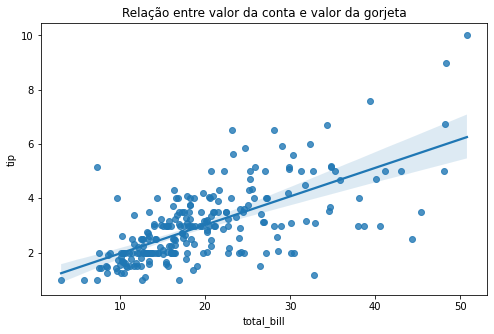

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Relação entre valor da conta e valor da gorjeta')
sns.regplot(x="total_bill", y="tip", data=tips)
plt.show()

Quando os conjuntos de dados possuem múltiplas variáveis, pode ser útil visualizar várias delas na mesma visualização.
Uma melhor abordagem é visualizar os dois no mesmo gráfico de dispersão. Isso pode ser feito utilizando outros atributos visuais, como a cor ou a forma dos pontos, para distinguir variáveis categóricas. Além disso, existe uma terceira variável categórica referente ao tamanho da mesa. Assim, três variáveis quantitativas podem ser representadas no mesmo gráfico de dispersão, mapeando uma delas para uma escala de cor ou para o tamanho dos pontos. Esse tipo de gráfico também é chamado de gráfico de bolhas.

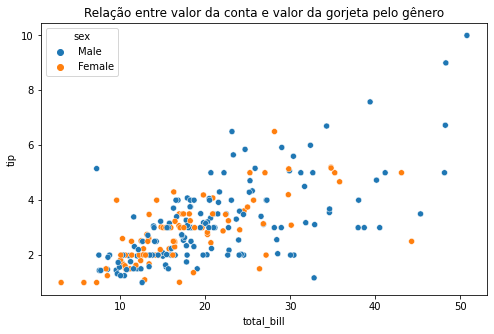

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Relação entre valor da conta e valor da gorjeta pelo gênero')
sns.scatterplot(x="total_bill", y="tip", hue = 'sex', data=tips)
plt.show()

A função relplot() é uma versão mais geral da scatterplot(), mas que é baseada em uma classe do seaborn chamada FacetGrid, que permite criar grades de visualizações. Para isso, basta passar o nome da coluna que se deseja separar em grade para o parâmetro col. De resto, ela é muito similar à função scatterplot(), com a diferença de que não é possível alterar as configurações visuais da visualização através das funções do matplotlib, devido ao FacetGrid possuir suas próprias configurações visuais.

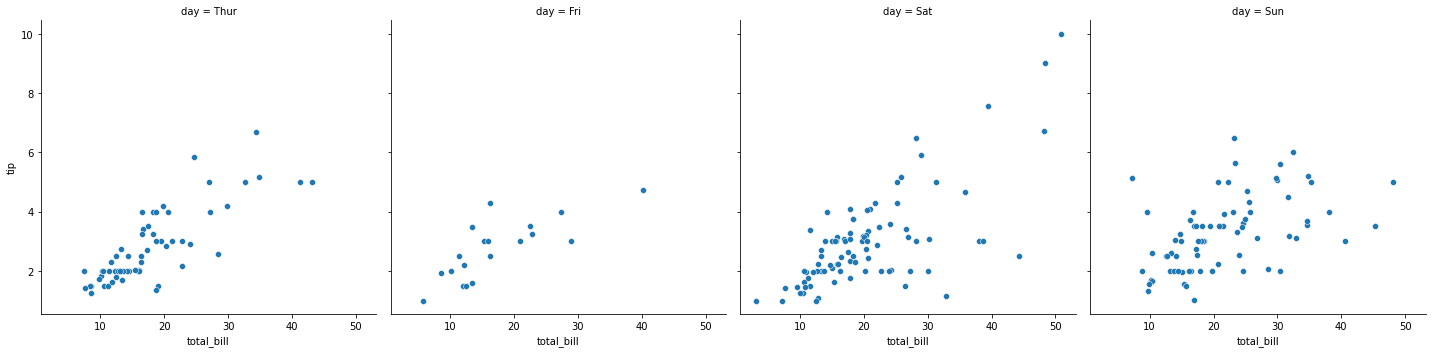

In [ ]:
sns.relplot(x="total_bill", y="tip", col = 'day', data=tips)

No gráfico de dispersão, onde visualizamos as diferenças entre homens e mulheres, talvez não tenha ficado evidente a correlação que existe em cada grupo. Uma forma de dar ênfase a essa comparação é através de retas de regressão. Todavia, a já estudada função regplot() não possui o parâmetro hue. Porém, existe uma função, baseada no FacetGrid, que permite fazer isso. Ela é chamada de lmplot(), que é uma forma mais geral do regplot(). Ou seja, você pode utilizá-la com os mesmos parâmetros passados para a função scatterplot(), lembrando que, como ela é baseada em FacetGrid, não pode ser utilizada em conjunto com as funções de título ou tamanho do matplotlib, por exemplo.

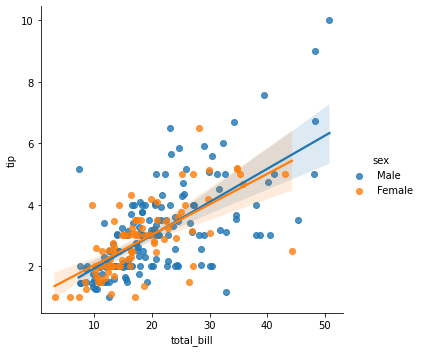

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue = 'sex', data=tips)

A variável quantitativa size representa o tamanho das mesas (mesa para 1, para 2 etc.). É possível visualizar ela em conjunto com o valor da conta e o da gorjeta? Vamos lá! Existem, basicamente, duas formas de fazer isso: através de uma escala de cor, e através do tamanho dos pontos. Para mapear uma variável quantitativa para a cor, é idêntico ao que foi feito ao mapear uma variável categórica para cor: basta, na passagem de parâmetros da função, passar o nome da coluna desejada para o parâmetro hue. A diferença é que, se você passar uma variável quantitativa, o seaborn irá utilizar uma escala de cor para representá-la. 

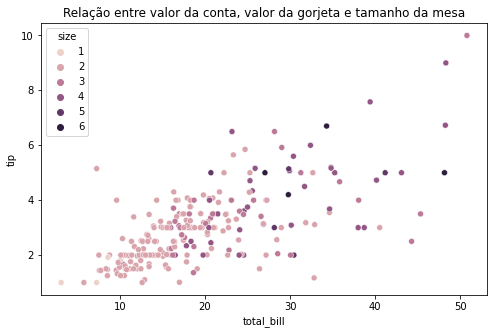

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Relação entre valor da conta, valor da gorjeta e tamanho da mesa')
sns.scatterplot(x="total_bill", y="tip", hue = 'size', data=tips)
plt.show()

Uma outra maneira de representar essa variável é através do tamanho dos círculos, de modo que quanto maior o círculo, maior o tamanho da mesa. Para isso, a função scatterplot() possui o parâmetro size. No exemplo a seguir, a coluna ‘size’ será passada ao parâmetro size, para mapear o tamanho das mesas no tamanho dos círculos. 

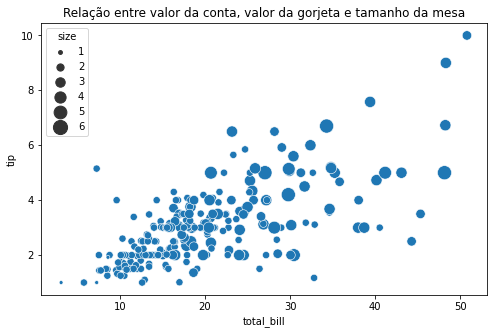

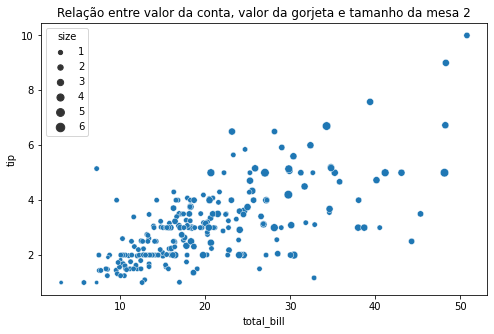

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Relação entre valor da conta, valor da gorjeta e tamanho da mesa')
sns.scatterplot(x="total_bill", y="tip", size = 'size', sizes=(15, 200), data=tips)
plt.show()

plt.figure(figsize=(8,5))
plt.title('Relação entre valor da conta, valor da gorjeta e tamanho da mesa 2')
sns.scatterplot(x="total_bill", y="tip", size = 'size', sizes=None, data=tips)
plt.show()

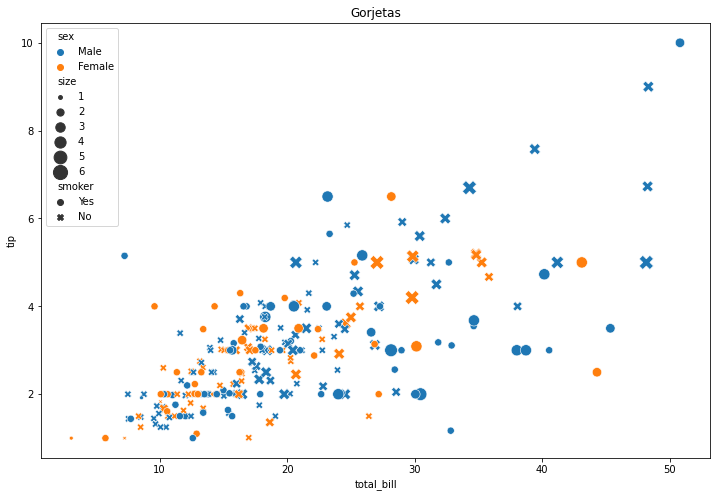

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Gorjetas')
sns.scatterplot(x="total_bill", y="tip", size = 'size', hue = 'sex', style = 'smoker', sizes=(15, 200), data=tips)
plt.show()


#OFICINA


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

consumo de galão de combustível por milha (miles per galon, mpg), número de cilindros, cilindrada, cavalos de potência, peso, aceleração, ano do modelo, país de origem e nome do carro.

In [ ]:
mpg = sns.load_dataset("mpg")
mpg.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


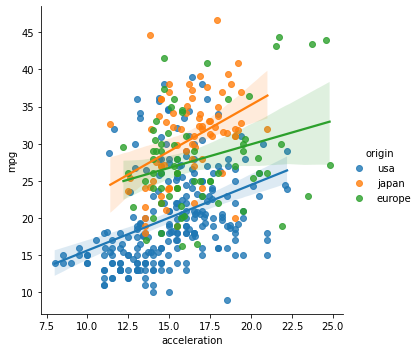

In [ ]:
#acceleration x mpg - pais
sns.lmplot(x="acceleration", y="mpg", hue = 'origin', data=mpg)

'''
Sim, existe correlação entre a aceleração e o consumo de combustivel, contudo esse correlação
se comporta de modos diferentes dependo do pais
'''

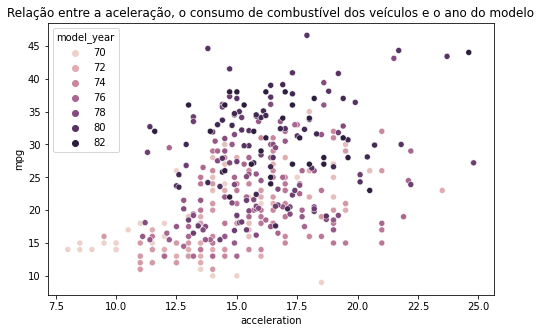

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Relação entre a aceleração, o consumo de combustível dos veículos e o ano do modelo')
sns.scatterplot(x="acceleration", y="mpg", hue = 'model_year', data=mpg)
plt.show()